In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('train.csv')

In [4]:
data.columns

Index(['reservation_id', 'booking_date', 'checkin_date', 'checkout_date',
       'channel_code', 'main_product_code', 'numberofadults',
       'numberofchildren', 'persontravellingid', 'resort_region_code',
       'resort_type_code', 'room_type_booked_code', 'roomnights',
       'season_holidayed_code', 'state_code_residence', 'state_code_resort',
       'total_pax', 'member_age_buckets', 'booking_type_code', 'memberid',
       'cluster_code', 'reservationstatusid_code', 'resort_id',
       'amount_spent_per_room_night_scaled'],
      dtype='object')

In [5]:
data.head()

,reservation_id,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,...,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,07659f3758d8aee27f5a7e2887adeacb67021cb95ada1b...,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,...,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428
1,03930f033646d073462b35d411616323597715ac4fc398...,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,...,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563
2,d145a32920e6587ad95bfe299d80c0affa268220535aaf...,28/01/15,01/02/15,05/02/15,1,1,2,0,47,1,...,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602
3,cfd77f44811ed62f25a220b53324cdbafc662a4c9e5f04...,02/05/15,11/06/15,16/06/15,1,1,2,2,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943
4,937cff9e4dcfc2459620153dfc8b9962ac22bea67dfb29...,02/09/15,14/12/15,19/12/15,1,1,2,0,46,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346


In [6]:
cols = ['reservation_id']
data.drop(cols,axis=1, inplace=True)

In [8]:
data.isnull().sum()

booking_date                             0
checkin_date                             0
checkout_date                            0
channel_code                             0
main_product_code                        0
numberofadults                           0
numberofchildren                         0
persontravellingid                       0
resort_region_code                       0
resort_type_code                         0
room_type_booked_code                    0
roomnights                               0
season_holidayed_code                  114
state_code_residence                  4764
state_code_resort                        0
total_pax                                0
member_age_buckets                       0
booking_type_code                        0
memberid                                 0
cluster_code                             0
reservationstatusid_code                 0
resort_id                                0
amount_spent_per_room_night_scaled       0
dtype: int6

In [9]:
data['season_holidayed_code'].fillna(data['season_holidayed_code'].mode()[0],inplace=True)
data['state_code_residence'].fillna(data['state_code_residence'].mode()[0],inplace=True)

In [10]:
data.head()

,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,...,state_code_residence,state_code_resort,total_pax,member_age_buckets,booking_type_code,memberid,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled
0,05/04/18,05/04/18,06/04/18,3,1,2,0,46,3,3,...,7.0,3,3,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,C,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,7.706428
1,23/01/15,11/04/15,16/04/15,1,1,2,0,46,3,3,...,7.0,5,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,F,A,39fa9ec190eee7b6f4dff1100d6343e10918d044c75eac...,6.662563
2,28/01/15,01/02/15,05/02/15,1,1,2,0,47,1,5,...,7.0,1,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,E,A,535fa30d7e25dd8a49f1536779734ec8286108d115da50...,7.871602
3,02/05/15,11/06/15,16/06/15,1,1,2,2,46,2,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,5.344943
4,02/09/15,14/12/15,19/12/15,1,1,2,0,46,2,2,...,7.0,2,2,F,1,3d1539e56495b6991f0a3ef5a61ca3d03ce4fff7380e9a...,D,A,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,7.059346


In [11]:
#Converting to datetime
import datetime
data['booking_date'] = pd.to_datetime(data['booking_date'],dayfirst= True)
data['checkin_date'] = pd.to_datetime(data['checkin_date'],dayfirst= True)
data['checkout_date'] = pd.to_datetime(data['checkout_date'],dayfirst= True)

In [12]:
#Getting days
data['booking_day'] = data['booking_date'].dt.day_name()
data['checkin_day'] = data['checkin_date'].dt.day_name()
data['checkout_day'] = data['checkout_date'].dt.day_name()


In [15]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['member_age_buckets'] = labelencoder.fit_transform(data['member_age_buckets'])
data['cluster_code'] = labelencoder.fit_transform(data['cluster_code'])

data['memberid'] = labelencoder.fit_transform(data['memberid'])
data['reservationstatusid_code'] = labelencoder.fit_transform(data['reservationstatusid_code'])
data['resort_id'] = labelencoder.fit_transform(data['resort_id'])

In [16]:
data['booking_day'] = labelencoder.fit_transform(data['booking_day'])
data['checkin_day'] = labelencoder.fit_transform(data['checkin_day'])
data['checkout_day'] = labelencoder.fit_transform(data['checkout_day'])

In [17]:
data['year'] = data['checkin_date'].dt.year

In [18]:
data['booking_date']=data['booking_date'].dt.strftime("%Y%m%d").astype(int)
data['checkin_date']=data['checkin_date'].dt.strftime("%Y%m%d").astype(int)
data['checkout_date']=data['checkout_date'].dt.strftime("%Y%m%d").astype(int)


In [19]:
data['monthend'] = data['checkin_date'].astype(str).str.slice(start=6).astype(np.int64)
data['monthend'] = data['monthend'].apply(lambda x: 0 if x>21 else 1)

In [20]:
#Since there are some negative values in roomnights
data['roomnights']=abs(data['roomnights'])

In [21]:
data['family'] = ((data.numberofadults>=2) & (data.numberofchildren!=0))
data['family'] = labelencoder.fit_transform(data['family'])
data.head()

,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,numberofchildren,persontravellingid,resort_region_code,resort_type_code,...,cluster_code,reservationstatusid_code,resort_id,amount_spent_per_room_night_scaled,booking_day,checkin_day,checkout_day,year,monthend,family
0,20180405,20180405,20180406,3,1,2,0,46,3,3,...,5,2,7,7.706428,4,4,0,2018,1,0
1,20150123,20150411,20150416,1,1,2,0,46,3,3,...,5,0,1,6.662563,0,2,4,2015,1,0
2,20150128,20150201,20150205,1,1,2,0,47,1,5,...,4,0,9,7.871602,6,3,4,2015,1,0
3,20150502,20150611,20150616,1,1,2,2,46,2,2,...,3,0,25,5.344943,2,4,5,2015,1,1
4,20150902,20151214,20151219,1,1,2,0,46,2,2,...,3,0,25,7.059346,6,1,2,2015,1,0


In [ ]:
data.head()

In [22]:
data['numberofadults'] = data['numberofchildren'] + data['numberofadults']
data.drop('numberofchildren',axis=1,inplace=True)

In [23]:
data.dtypes

booking_date                            int32
checkin_date                            int32
checkout_date                           int32
channel_code                            int64
main_product_code                       int64
numberofadults                          int64
persontravellingid                      int64
resort_region_code                      int64
resort_type_code                        int64
room_type_booked_code                   int64
roomnights                              int64
season_holidayed_code                 float64
state_code_residence                  float64
state_code_resort                       int64
total_pax                               int64
member_age_buckets                      int64
booking_type_code                       int64
memberid                                int64
cluster_code                            int64
reservationstatusid_code                int64
resort_id                               int64
amount_spent_per_room_night_scaled

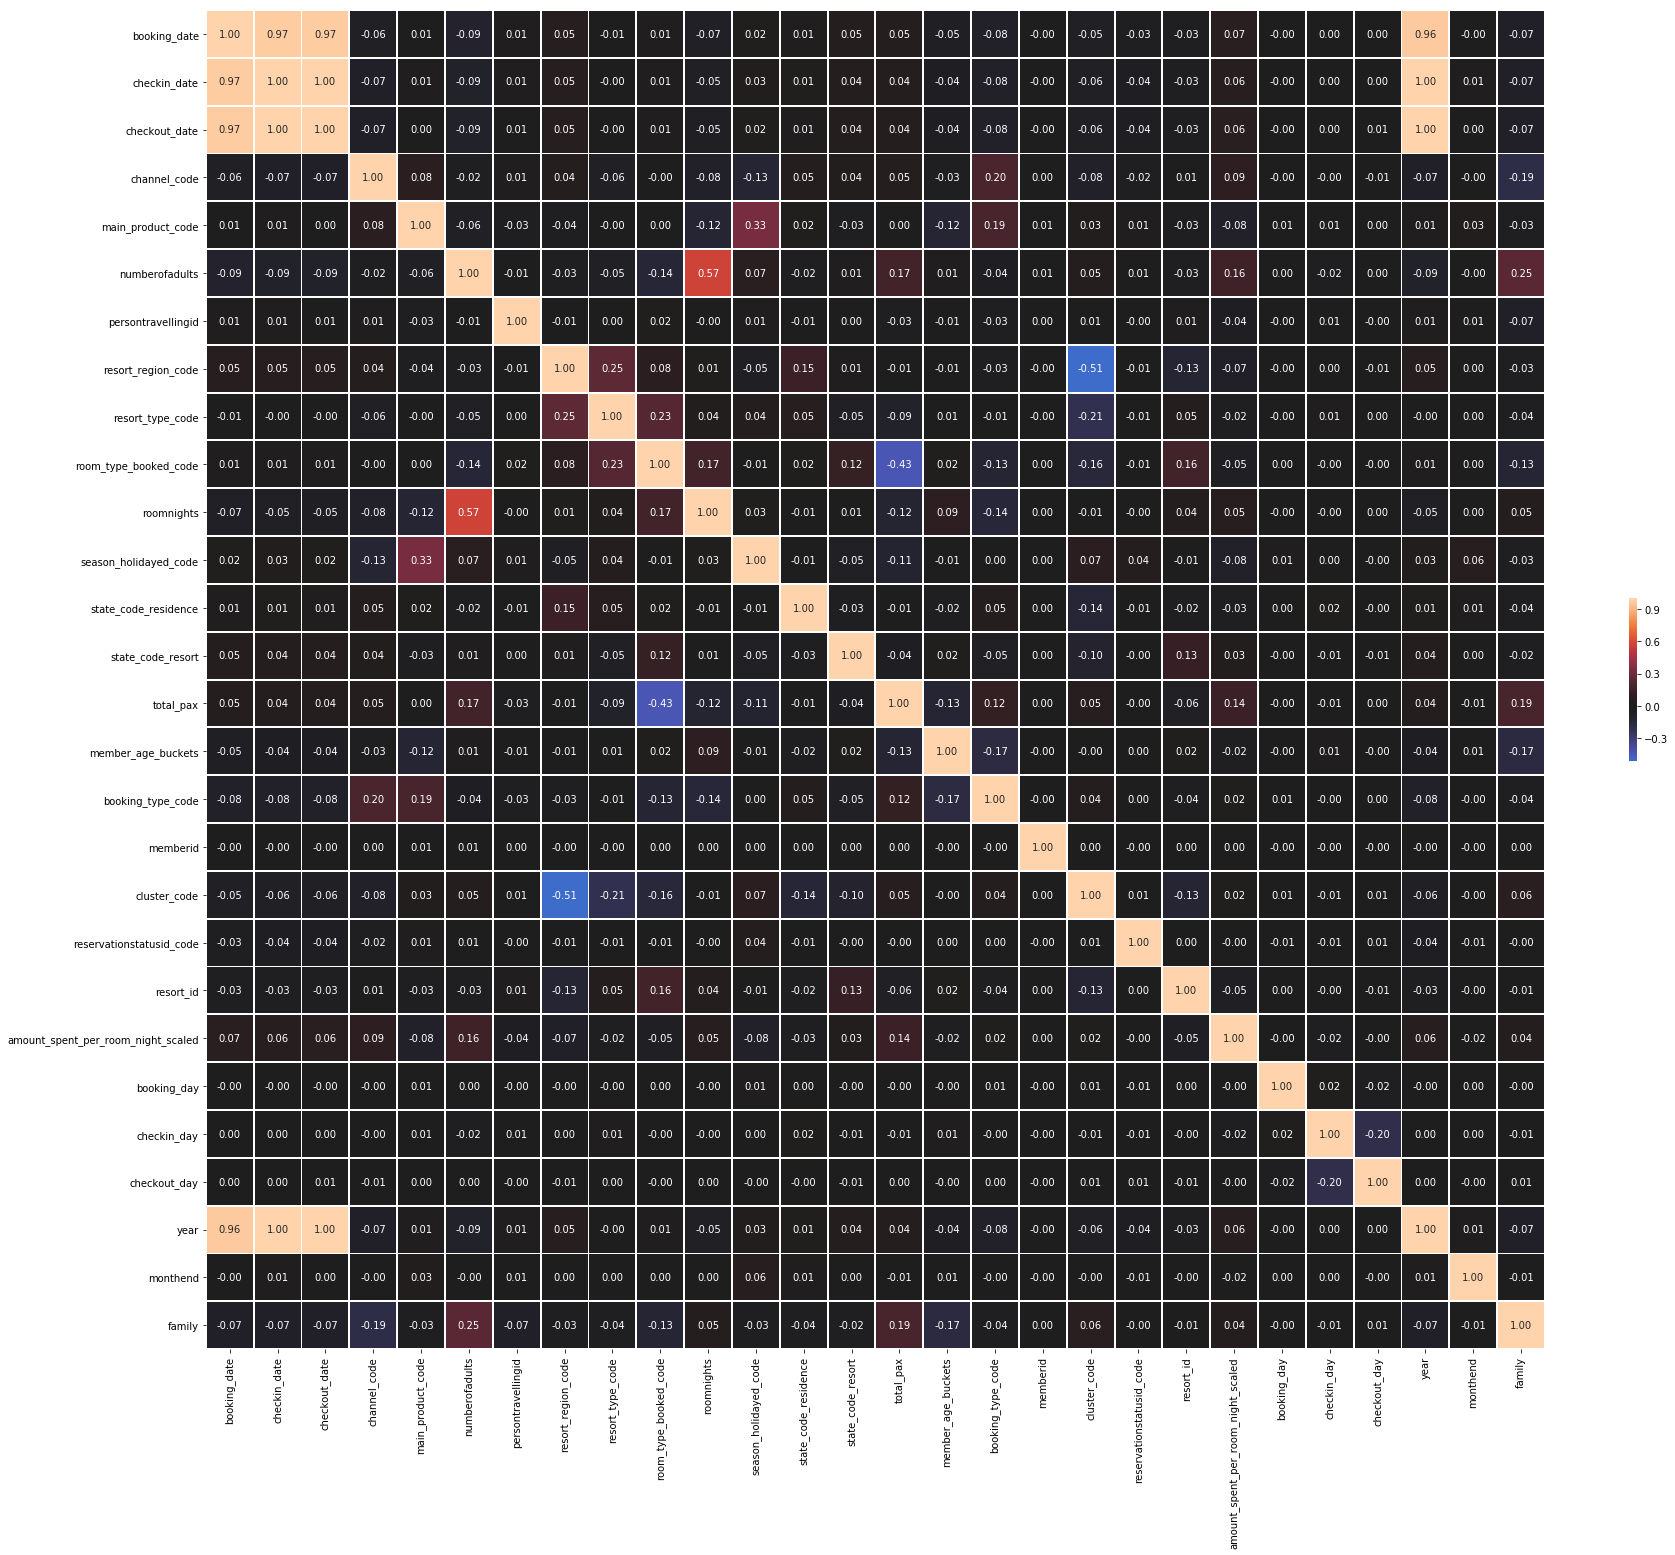

In [24]:
import seaborn as sns
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(30,30))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.9, annot=True, cbar_kws={"shrink": .1})
    plt.show();
    
correlation_heatmap(data)

In [25]:
data.isnull().sum()


booking_date                          0
checkin_date                          0
checkout_date                         0
channel_code                          0
main_product_code                     0
numberofadults                        0
persontravellingid                    0
resort_region_code                    0
resort_type_code                      0
room_type_booked_code                 0
roomnights                            0
season_holidayed_code                 0
state_code_residence                  0
state_code_resort                     0
total_pax                             0
member_age_buckets                    0
booking_type_code                     0
memberid                              0
cluster_code                          0
reservationstatusid_code              0
resort_id                             0
amount_spent_per_room_night_scaled    0
booking_day                           0
checkin_day                           0
checkout_day                          0


In [26]:
data.columns

Index(['booking_date', 'checkin_date', 'checkout_date', 'channel_code',
       'main_product_code', 'numberofadults', 'persontravellingid',
       'resort_region_code', 'resort_type_code', 'room_type_booked_code',
       'roomnights', 'season_holidayed_code', 'state_code_residence',
       'state_code_resort', 'total_pax', 'member_age_buckets',
       'booking_type_code', 'memberid', 'cluster_code',
       'reservationstatusid_code', 'resort_id',
       'amount_spent_per_room_night_scaled', 'booking_day', 'checkin_day',
       'checkout_day', 'year', 'monthend', 'family'],
      dtype='object')

In [72]:
data['roomnights'].min()

0

In [48]:
X_drop = ['amount_spent_per_room_night_scaled']

In [49]:

y = data['amount_spent_per_room_night_scaled']
X = data.drop(X_drop,axis=1)
X.head()

,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,...,memberid,cluster_code,reservationstatusid_code,resort_id,booking_day,checkin_day,checkout_day,year,monthend,family
0,20180405,20180405,20180406,3,1,2,46,3,3,3,...,24179,5,2,7,4,4,0,2018,1,0
1,20150123,20150411,20150416,1,1,2,46,3,3,4,...,24179,5,0,1,0,2,4,2015,1,0
2,20150128,20150201,20150205,1,1,2,47,1,5,4,...,24179,4,0,9,6,3,4,2015,1,0
3,20150502,20150611,20150616,1,1,4,46,2,2,3,...,24179,3,0,25,2,4,5,2015,1,1
4,20150902,20151214,20151219,1,1,2,46,2,2,4,...,24179,3,0,25,6,1,2,2015,1,0


In [50]:
from sklearn.cross_validation import train_test_split
trainX, validX, trainY, validY = train_test_split(X,y,test_size=0.20)

In [51]:
trainX.head()

,booking_date,checkin_date,checkout_date,channel_code,main_product_code,numberofadults,persontravellingid,resort_region_code,resort_type_code,room_type_booked_code,...,memberid,cluster_code,reservationstatusid_code,resort_id,booking_day,checkin_day,checkout_day,year,monthend,family
200816,20160822,20160925,20160929,1,2,2,4752,1,2,3,...,80571,5,0,27,1,3,4,2016,0,0
6558,20150826,20151112,20151115,1,2,3,45,1,2,3,...,17255,5,0,27,6,4,3,2015,1,1
214430,20180118,20180328,20180331,3,2,3,45,3,4,3,...,45889,5,0,8,4,6,2,2018,0,1
268902,20160728,20160901,20160902,3,1,4,45,2,2,2,...,90031,3,0,25,4,4,0,2016,1,1
224272,20160129,20160414,20160417,1,2,4,45,1,1,2,...,3657,4,0,4,0,4,3,2016,1,0


In [52]:
trainX.count()

booking_date                273139
checkin_date                273139
checkout_date               273139
channel_code                273139
main_product_code           273139
numberofadults              273139
persontravellingid          273139
resort_region_code          273139
resort_type_code            273139
room_type_booked_code       273139
roomnights                  273139
season_holidayed_code       273139
state_code_residence        273139
state_code_resort           273139
total_pax                   273139
member_age_buckets          273139
booking_type_code           273139
memberid                    273139
cluster_code                273139
reservationstatusid_code    273139
resort_id                   273139
booking_day                 273139
checkin_day                 273139
checkout_day                273139
year                        273139
monthend                    273139
family                      273139
dtype: int64

In [53]:
from sklearn.linear_model import LinearRegression
lin_regressor = LinearRegression()
lin_regressor.fit(trainX,trainY)
linear_pred = lin_regressor.predict(validX)

In [54]:
def rmse(actual_y,pred_y):
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    mse = mean_squared_error(actual_y,pred_y)
    return 100*sqrt(mse)
    


In [55]:
rmse(validY,linear_pred)

104.61996197172935

In [58]:
import lightgbm as lgb
train_data = lgb.Dataset(trainX, label = trainY)
val_data = lgb.Dataset(validX, label = validY)

In [59]:
param = {"num_leaves": 8,
         "learning_rate": 0.1,
         "objective":'regression_l2', 
         "metric": 'rmse',
         "reg_alpha": 4.75,
         "reg_lambda": 1.25,
         "min_child_samples": 300}
mlgb = lgb.train(param, train_data, 200000, valid_sets = [train_data, val_data], early_stopping_rounds = 2000, verbose_eval=2000)

Training until validation scores don't improve for 2000 rounds.
[2000]	training's rmse: 0.962551	valid_1's rmse: 0.982112
[4000]	training's rmse: 0.945901	valid_1's rmse: 0.982041
Early stopping, best iteration is:
[2384]	training's rmse: 0.958866	valid_1's rmse: 0.98178


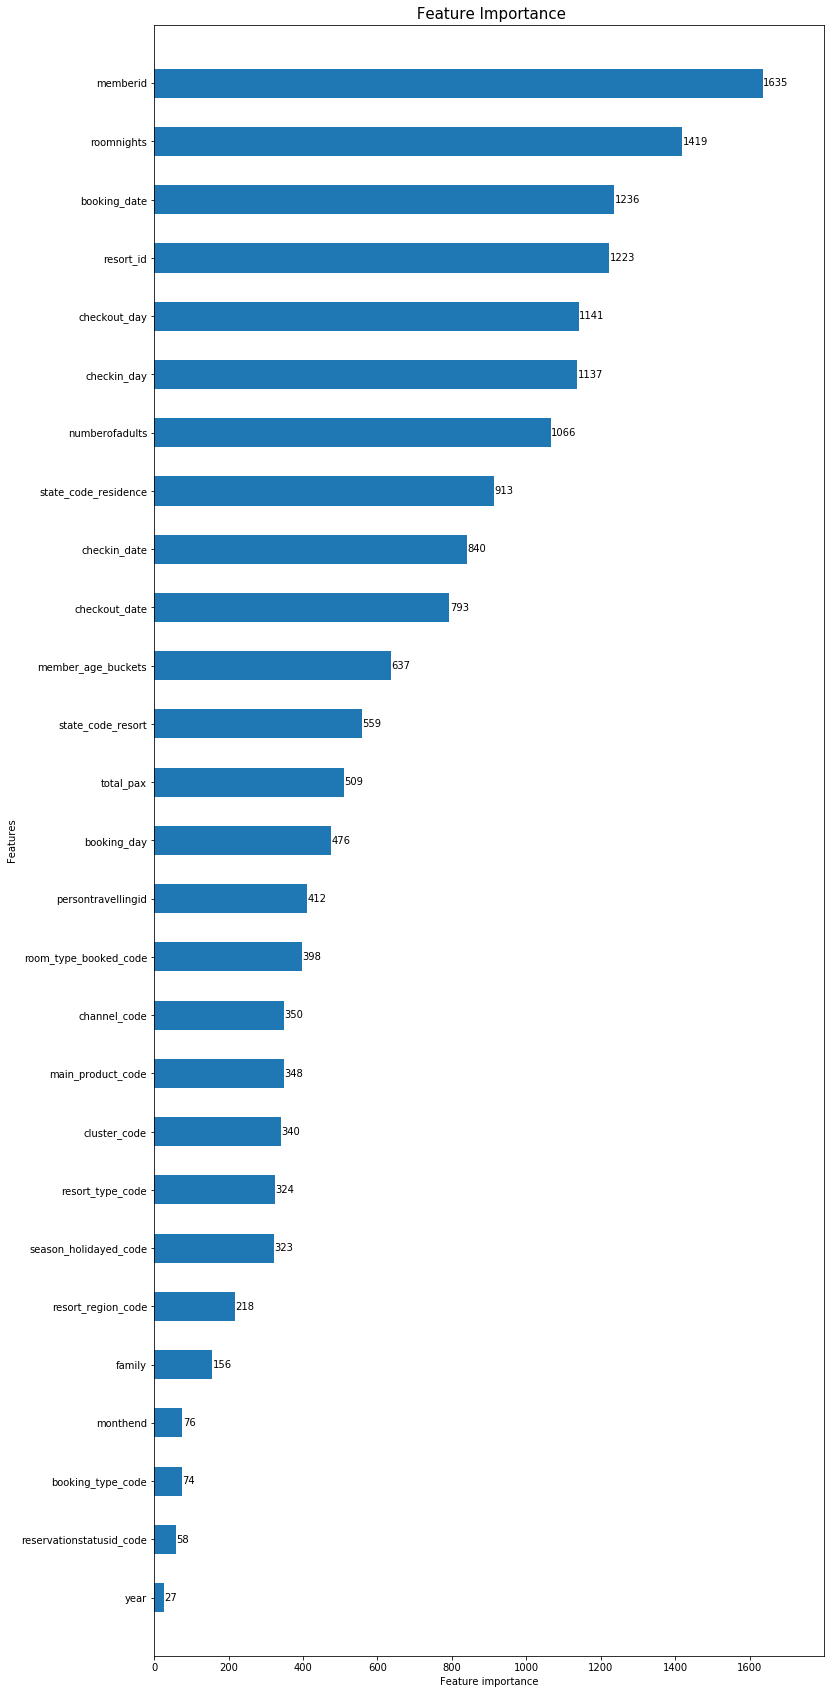

In [66]:
fig, ax = plt.subplots(figsize=(12,30))
lgb.plot_importance(mlgb, max_num_features=27, height=0.5, ax=ax)
plt.title(" Feature Importance", fontsize=15)
ax.grid(False)
plt.show()

In [67]:
from sklearn.ensemble import GradientBoostingRegressor

xgb_regressor = GradientBoostingRegressor(max_depth=7,learning_rate = 0.1)
xgb_regressor.fit(trainX, trainY)
xgb_pred = xgb_regressor.predict(validX)
#print(n_est)
print(rmse(validY,xgb_pred))

99.46293914423315
